# **Set up the notebook**

In [ ]:
import numpy as np
import pandas as pd
import math
pd.plotting.register_matplotlib_converters()

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

from numpy import loadtxt
from xgboost import XGBClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

import seaborn as sns
import missingno as msno

mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

# **Select a dataset**

# And
# **Load the data**
> As you learned in the previous tutorial, we load the dataset using the `"pd.read_csv"` command.

In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

# Path of the file to read
ign_filepath = "../input/diamonds/diamonds.csv"

# Fill in the line below to read the file into a variable ign_data
# index_col means what the dataframe indexcolm is.
data = pd.read_csv(ign_filepath, index_col="Unnamed: 0")

print("setup completed")

> let's see what we have by running the head() function or the tail() function to see the first or last 5 rows of the dataframe

In [ ]:
data.head()

## Features
* Carat : Carat weight of the Diamond.
* Cut : Describe cut quality of the diamond.
> Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* Color : Color of the Diamond.
> With D being the best and J the worst.
* Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
> (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* Price : the Price of the Diamond.
* X : Length of the Diamond in mm.
* Y : Width of the Diamond in mm.
* Z : Height of the Diamond in mm.

Qualitative Features (Categorical) : Cut, Color, Clarity.

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

### Price is the Target Variable.
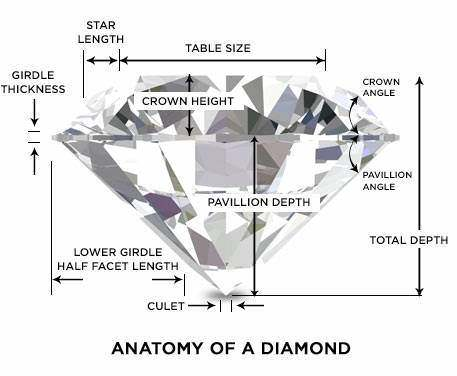


In [ ]:
# let's see the shape
data.shape

In [ ]:
# check some info about this dataset
data.info()

In [ ]:
# check if there are any NaN variables.
data.isnull().sum()

In [ ]:
# just to visualize. no missing values.
msno.matrix(data)

So there are no no NaN values

In [ ]:
# let's see some things about it
data.describe()

## Do you see the min of x, y and z!
## That can be good and posible.
let's zoom in

In [ ]:
# data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
# data[(data['x']==0) | (data['y']==0) | (data['z']==0)]
data.loc()


In [ ]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])

## So there are 20 rows with a dimation of zero.
* I will just remove those instad of filling them with some Mean.

In [ ]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

# Just to Confirm
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

## Correlation Between Features

In [ ]:
# Correlation Map
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

# Conclution
So what can you see?
1. The Price of the Diamond is highly correlated to Carat, and its Dimensions.
2. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.
3. Depth is inversely related to Price.
> * This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
4. The Weight (Carat) of a diamond has the most significant impact on its Price.

In [ ]:
sns.kdeplot(data['carat'], shade=True , color='b')

Here you can see that higher carat is rearer than lower carat.

### Carat vs Price

In [ ]:
sns.jointplot(x='carat' , y='price' , data=data , height=5)

It seems that Carat varies with Price Exponentially.¶

# Cut

In [ ]:
sns.catplot(x='cut', data=data , kind='count',aspect=2.5 )

# Cut vs Price

In [ ]:
sns.factorplot(x='cut', y='price', data=data, kind='box', aspect=2.5)

# Understanding Box Plot :

# The bottom line indicates the min value of Age.
# The upper line indicates the max value.
# The middle line of the box is the median or the 50% percentile.
# The side lines of the box are the 25 and 75 percentiles respectively.

# Color vs Price

In [ ]:
sns.catplot(x='color', y='price' , data=data , kind='violin', aspect=2.5)

# Clarity vs Price

In [ ]:
sns.boxplot(x='clarity', y='price', data=data)

# Volume

In [ ]:
data['volume'] = data['x'] * data['y'] * data['z']
data.head()

In [ ]:
sns.jointplot(x='volume', y='price', data=data, height=5)

In [ ]:
data = data[(data["volume"]<800)]
sns.jointplot(x='volume', y='price', data=data, height=5)

It seems like it's a exponentional growht

Remove X, Y and Z axais

In [ ]:
data.drop(['x','y','z'], axis=1, inplace= True)

In [ ]:
# Label to numbers
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])
data.head()

# Scaling

In [ ]:
# Split the data into train and test.

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)
X_train.head()
# y_train.head()

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)